### EE 421/521 Image Processing - Spring 2021-22

## Lecture 12 - Image Coding

#### 12 May 2022

In this lecture, you will learn how to implement the following:

1. Calculating the Entropy of an Image
2. Demonstrating Spectral Redundancy
3. Demonstrating Spatial Redundancy
4. Scalar Huffman Coding

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

In [1]:
# import necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# array operations
import numpy as np

# mathematical calculations
import math

# data frame operations
import pandas as pd


In [2]:
# my function to convert to lumincance, round to nearest integer, 
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    dim_img = imgRGB.shape[2]    
    assert dim_img >= 3
    
    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

In [3]:
# my function to round image data to nearest integer, then
# truncate to range [0, 255], and then set data type to uint8

def my_imgTruncate(img):
    
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

# end of function

In [4]:
# my function to convert from RGB to Lum

def my_RGB2Lum_Byte(imgRGB):
    
    N, M, D = imgRGB.shape
    
    assert N > 0
    assert M > 0
    assert D == 3
    
    # RGB to YUV conversion matrix    
    rgb2lum = np.array([0.299, 0.587, 0.114])
        
    # convert from RGB to YUV
    imgLum = np.dot(imgRGB, np.transpose(rgb2lum))
   
    # truncate to [0,255] and set as byte
    return my_imgTruncate(imgLum)

# end of my function

In [5]:
# my function to convert from RGB to YUV

def my_RGB2YUV_Byte(imgRGB):
    
    N, M, D = imgRGB.shape
    
    assert N > 0
    assert M > 0
    assert D == 3
    
    # RGB to YUV conversion matrix    
    rgb2yuv = np.array([[0.299,    0.587,    0.114   ],
                       [-0.168736, -0.331264,  0.5   ],
                       [ 0.5,   -0.418688, -0.081312]])
        
    # convert from RGB to YUV
    imgYUV = np.dot(imgRGB, np.transpose(rgb2yuv))
    
    # add 128 to U and V bands
    imgYUV[:,:,1] += 128.0
    imgYUV[:,:,2] += 128.0
    
    # truncate to [0,255] and set as byte
    return my_imgTruncate(imgYUV)

# end of my function

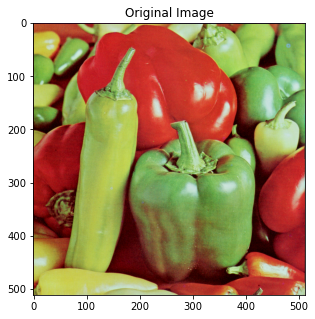

In [6]:
# set image folder
image_folder = r'/Users/tanjuerdem/EE421521_2022/images'
image_folder = r'C:\Users\Metin\Desktop\EE421\Week12'


# read an image file
image_file = r'/fruits.png'
image_file = r'/peppers.png'


image_path = image_folder + image_file
imgRGB = io.imread(image_path)

plt.figure(figsize=(5,5))
plt.subplot(111), plt.imshow(imgRGB)
#plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.show()
plt.close()


---------------------------------------------------------------
### **Part 1:** Calculating the Entropy of an Image


In [7]:
# my function to calculate the histrogram of an image

# img: image with a single color band
# nBit: number of most significant bits to retain
def my_Histogram(img, nBit):
    
    # calculate the number of levels corresponding to the number of bits retained
    nLevel = 2**nBit

    # quantize the image to the specified number of bits
    valMax = 0
    for i in range(8-nBit,8):
        valMax += 2**i
    
    # retain only the most significant nBit bits
    imgQuan = img & valMax

    # calculate the histogram of the quantized image
    hist = np.zeros((nLevel,), dtype=int)
    valMin = 2**(8-nBit)
    for n in range(nLevel):
        hist[n] = np.count_nonzero(imgQuan==n*valMin)
    
    # return the histogram, quantized image, and number of levels
    return hist, imgQuan, nLevel

# end of my function

In [8]:
# calculate the entropy of a pdf
def my_Entropy(pdf):
    
    assert pdf.ndim == 1
    size = pdf.size
        
    entropy = 0.0
    for i in range(size):
        val = pdf[i]
        if val:
            entropy += - val * math.log2(val)

    return entropy

# end of my function

---------------------------------------------------------------
### **Part 2:** Demonstrating Spectral Redundancy


Entropy of color bands R, G, B: 7.34, 7.50, 7.06
Total entropy: 21.89


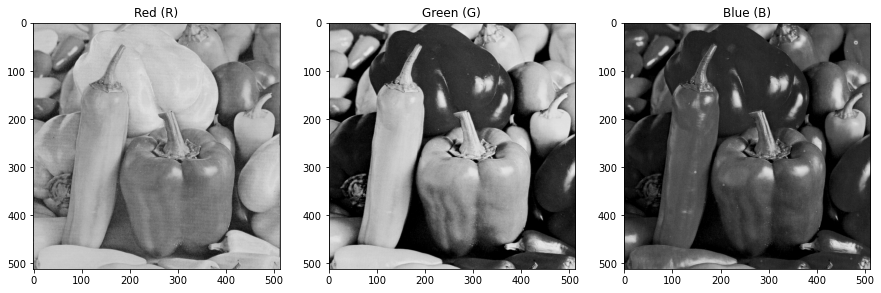

In [9]:
# calculate entropy of an RGB image

# histrogram of color bands
hist_R, x, y = my_Histogram(imgRGB[:,:,0], 8)
hist_G, x, y = my_Histogram(imgRGB[:,:,1], 8)
hist_B, x, y = my_Histogram(imgRGB[:,:,2], 8)

# pdf of color bands
pdf_R = hist_R / hist_R.sum()
pdf_G = hist_G / hist_G.sum()
pdf_B = hist_B / hist_B.sum()

# entropy of color bands
entropy_R = my_Entropy(pdf_R)
entropy_G = my_Entropy(pdf_G)
entropy_B = my_Entropy(pdf_B)

print('Entropy of color bands R, G, B: {:.2f}, {:.2f}, {:.2f}'.format(entropy_R, entropy_G, entropy_B))

# calculate total entropy
entropy_total = entropy_R + entropy_G + entropy_B
print('Total entropy: {:.2f}'.format(entropy_total))

# display RGB bands
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(imgRGB[:,:,0], cmap='gray', vmin=0, vmax=255)
plt.title('Red (R)')
plt.subplot(132), plt.imshow(imgRGB[:,:,1], cmap='gray', vmin=0, vmax=255)
plt.title('Green (G)')
plt.subplot(133), plt.imshow(imgRGB[:,:,2], cmap='gray', vmin=0, vmax=255)
plt.title('Blue (B)')
plt.show()
plt.close()

Entropy of color bands Y, U, V: 7.59, 5.82, 6.67
Total entropy: 20.08


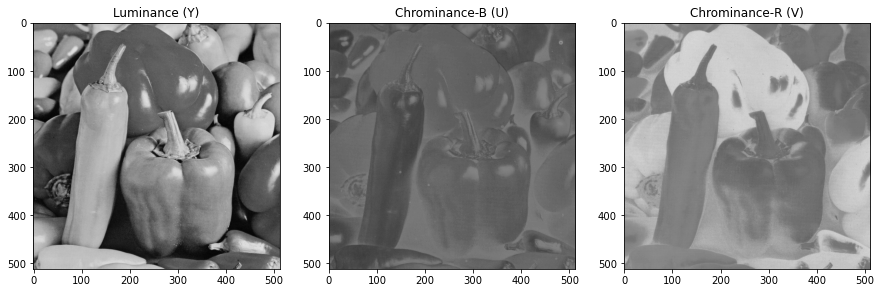

In [10]:
# calculate entropy of a YUV image

imgYUV = my_RGB2YUV_Byte(imgRGB)

# histrogram of color bands
hist_Y, x, y = my_Histogram(imgYUV[:,:,0], 8)
hist_U, x, y = my_Histogram(imgYUV[:,:,1], 8)
hist_V, x, y = my_Histogram(imgYUV[:,:,2], 8)

# pdf of color bands
pdf_Y = hist_Y / hist_Y.sum()
pdf_U = hist_U / hist_U.sum()
pdf_V = hist_V / hist_V.sum()

# entropy of color bands
entropy_Y = my_Entropy(pdf_Y)
entropy_U = my_Entropy(pdf_U)
entropy_V = my_Entropy(pdf_V)

print('Entropy of color bands Y, U, V: {:.2f}, {:.2f}, {:.2f}'.format(entropy_Y, entropy_U, entropy_V))

# calculate total entropy
entropy_total = entropy_Y + entropy_U + entropy_V
print('Total entropy: {:.2f}'.format(entropy_total))

# display YUV bands
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(imgYUV[:,:,0], cmap='gray', vmin=0, vmax=255)
plt.title('Luminance (Y)')
plt.subplot(132), plt.imshow(imgYUV[:,:,1], cmap='gray', vmin=0, vmax=255)
plt.title('Chrominance-B (U)')
plt.subplot(133), plt.imshow(imgYUV[:,:,2], cmap='gray', vmin=0, vmax=255)
plt.title('Chrominance-R (V)')
plt.show()
plt.close()

---------------------------------------------------------------
### **Part 3:** Demonstrating Spatial Redundancy


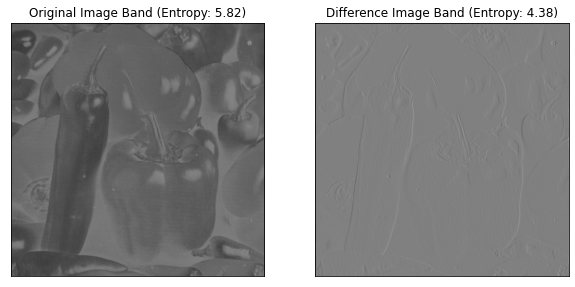

In [11]:
# calculate the entropy of the horizontal difference image

# get a single band of input image
#imgBand = imgRGB[:,:,1]
imgBand = imgYUV[:,:,1]

# calculate entropy of image band
hist_Band, x, y = my_Histogram(imgBand, 8)
# pdf of luminance
pdf_Band = hist_Band / hist_Band.sum()
# entropy of luminance
entropy_Band = my_Entropy(pdf_Band)

# calculate horizontal difference image
imgDiffHor = imgBand.copy()
imgDiffHor[:,1:] -= imgDiffHor[:,:-1]
imgDiffHor[:,1:] += 128

# calculate entropy of horizontal difference
hist_DiffHor, x, y = my_Histogram(imgDiffHor, 8)
# pdf of horizontal difference
pdf_DiffHor = hist_DiffHor / hist_DiffHor.sum()
# entropy of horizontal difference
entropy_DiffHor = my_Entropy(pdf_DiffHor)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(imgBand, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image Band (Entropy: {:.2f})'.format(entropy_Band)), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgDiffHor, cmap='gray', vmin=0, vmax=255)
plt.title('Difference Image Band (Entropy: {:.2f})'.format(entropy_DiffHor)), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()


---------------------------------------------------------------
### **Part 4:** Scalar Huffman Coding


In [12]:
# my function for obtaining a Huffman code for a given set of symbols
def my_Huffman(df):
    
    print("\nInput Source:\n", df)  
    
    # 1. sort the symbols in decreasing probabilities
    df.sort_values(by=['probabilities'], ascending=False, inplace=True)
    
    # 2. if more than 2 symbols, merge the last two symbols to obtain a reduced source
    # last code of the reduced source
    last_code = ''
    length = df.shape[0]
    if length > 2:
        # copy the source except the last symbol
        df_merged = df[:-1].copy(deep=True)
        # combine the last two symbols
        df_merged.iloc[-1, 1] += df.iloc[-1, 1]
        # combine the last two probabilities
        df_merged.iloc[-1, 2] += df.iloc[-1, 2]
        # re-number the symbols from 0 to length-1
        for i in range(length-1):
            df_merged.iloc[i,0] = i
            
        # 3. find the Huffman code for the reduced source
        my_Huffman(df_merged)   

        # 4. copy the codewords from the reduced source
        for i in range(length-2):
            df.iloc[i, 3] = df_merged.iloc[i, 3]
        last_code = df_merged.iloc[length-2, 3]

    # 4. add 0 and 1 two the last two codewords, respectively 
    df.iloc[-2, 3] = last_code + '0'
    df.iloc[-1, 3] = last_code + '1'
    
    # 5. unsort the symbols
    df.sort_values(by=['order'], ascending=True, inplace=True)

    print("\nReturned Codes:\n", df)  
        
    return

# end of my function


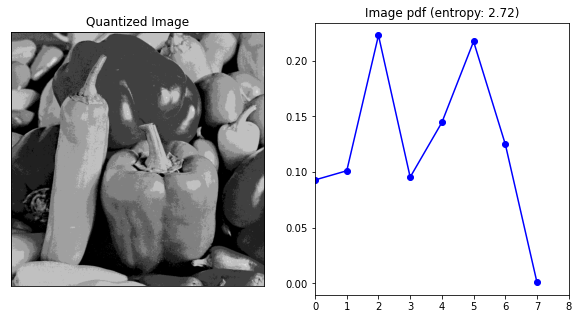

In [13]:
# Huffman Coding

# get a luminance image
if imgRGB.ndim >= 3:
    # calculate the luminance image
    imgLum = my_imgLuminance(imgRGB)
else:
    imgLum = imgRGB

# calculate the histogram
nBit = 3
histLum, imgLumQuan, numLevel = my_Histogram(imgLum, nBit)

# calculate the pdf
pdfLum = histLum / histLum.sum()

# calculate the entropy
entLum = my_Entropy(pdfLum)

# plot pdf
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(imgLumQuan, cmap='gray', vmin=0, vmax=255)
plt.title('Quantized Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(pdfLum, color = 'b', marker = 'o')
plt.xlim([0,numLevel])
plt.title('Image pdf (entropy: {:.2f})'.format(entLum))
plt.show()
plt.close()


In [14]:
# define probabilities and codewords
order = []
symbols = []
probabilities = []
codewords = []
for i, p in enumerate(pdfLum):
    order.append(i) # used to unsort the symbols
    symbols.append(chr(i+97)) # letters to represent symbols
    probabilities.append(p) # probabilities of symbols
    codewords.append('') # used to hold the codewords

# create a dictionary of order, symbols, probabilities and codewords
data_source = {'order': order, 'symbols': symbols, 'probabilities': probabilities, 'codewords': codewords}

# create a pandas data frame from the above dictionary
frame_source = pd.DataFrame(data_source)

# find Huffman codes
my_Huffman(frame_source)



Input Source:
    order symbols  probabilities codewords
0      0       a       0.092907          
1      1       b       0.101135          
2      2       c       0.222813          
3      3       d       0.095402          
4      4       e       0.144573          
5      5       f       0.217346          
6      6       g       0.125042          
7      7       h       0.000782          

Input Source:
    order symbols  probabilities codewords
2      0       c       0.222813          
5      1       f       0.217346          
4      2       e       0.144573          
6      3       g       0.125042          
1      4       b       0.101135          
3      5       d       0.095402          
0      6      ah       0.093689          

Input Source:
    order symbols  probabilities codewords
2      0       c       0.222813          
5      1       f       0.217346          
4      2       e       0.144573          
6      3       g       0.125042          
1      4       b       0.101

In [15]:
# find average codeword length of the Huffman code

# get the number of codewords
length = frame_source.shape[0]

# calculate the average codeword length
average_length = 0
for i in range(length):
    code_probability = frame_source.iloc[i, 2]
    code_length = len(frame_source.iloc[i, 3])
    average_length += code_probability * code_length

print('Number of bits:         ', nBit)

print('Average Codeword Length: {:.3f}'.format(average_length))

# calculate the entropy
entLum = my_Entropy(pdfLum)

print('Entropy of the source:   {:.3f}'.format(entLum))


Number of bits:          3
Average Codeword Length: 2.843
Entropy of the source:   2.724
